In [239]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Dataframe

In [240]:

df = pd.read_csv(r"D:\ML\First ML\data\delaney_solubility_with_descriptors.csv")
df.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


Data Sepration

In [241]:
y = df['logS']
y.head()

0   -2.18
1   -2.00
2   -1.74
3   -1.48
4   -3.04
Name: logS, dtype: float64

In [242]:
x = df.drop('logS', axis=1)
x.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.5954,167.850,0.0,0.0
1,2.3765,133.405,0.0,0.0
2,2.5938,167.850,1.0,0.0
3,2.0289,133.405,1.0,0.0
4,2.9189,187.375,1.0,0.0


Data Splitting

In [243]:

from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=100)

In [244]:
xTrain

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [245]:
xTest

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


Building Model

Linear Regresion

In [246]:
# Linear Regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(xTrain, yTrain)

LinearRegression()

Model Prediction (Linear Regression)

In [247]:
yLrTestPred = lr.predict(xTest)
yLrTrainPred = lr.predict(xTrain)

Compare Data Model (Linear Regression)

In [248]:
yTrain

107   -4.440
378   -1.250
529   -1.655
546   -1.886
320   -0.740
       ...  
802   -2.925
53    -2.680
350   -7.020
79    -4.800
792   -3.240
Name: logS, Length: 915, dtype: float64

In [249]:
yLrTrainPred

array([-2.83668969,  0.84208401, -0.50930302, -0.13058053, -1.6269208 ,
       -2.86103037, -2.32208333, -4.16684323, -5.04235077, -2.29737009,
       -3.15082845, -4.33037208, -1.43700682, -2.59060064, -7.09025955,
       -2.32734557, -4.19073421, -2.63904005, -3.58104074, -3.75929058,
       -2.5501665 , -3.26968347, -2.78911367, -2.69251051, -0.77437547,
       -6.61955792, -2.99084623, -2.36975061, -7.18167736, -1.52816491,
       -4.81736265, -0.86996608, -7.09025955, -1.87404275, -2.58013247,
       -4.80953284, -4.17454084, -1.95444152, -3.50503339, -2.7411418 ,
       -1.87131835, -2.45270806, -3.07252433, -1.48988982, -3.98778754,
       -1.35216679, -0.16932277, -6.05237002, -3.29550658,  0.30513174,
       -3.25501463, -5.31993586, -0.4733928 , -4.79180882, -5.82486323,
       -2.70343539, -3.70838271, -2.4987341 , -2.12301018, -3.11393974,
       -2.79842053, -1.38274662, -4.3267103 , -3.57778946, -3.42356884,
       -9.15826626, -6.52588866, -1.75832085, -4.97842312, -1.59

Evaluate Model Perform (Linear Regression)

In [250]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error
r2 = r2_score


In [251]:
# Train
LrTrainMse = mse(yTrain, yLrTrainPred)
LrTrainR2 = r2(yTrain, yLrTrainPred)

# Test
LrTestMse = mse(yTest, yLrTestPred)
LrTestR2 = r2(yTest, yLrTestPred)

In [252]:
LrResult = pd.DataFrame(['LinearRegression', LrTrainMse, LrTrainR2, LrTestMse, LrTestR2]).transpose()
LrResult.columns= ['Method', 'TrainingMSE', 'TrainingR2', 'TestMSE', 'TestR2']

In [253]:
# Linear Regresion Result
LrResult

,Method,TrainingMSE,TrainingR2,TestMSE,TestR2
0,LinearRegression,1.007536,0.764505,1.020695,0.789162


Random Forest

Training Model

In [254]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(xTrain, yTrain)

RandomForestRegressor(max_depth=2, random_state=100)

Model Prediction

In [255]:
yRfTrainPred = rf.predict(xTrain, )
yRfTestPred = rf.predict(xTest)

Compare Data Model (Random Forest)

In [256]:
yTrain

107   -4.440
378   -1.250
529   -1.655
546   -1.886
320   -0.740
       ...  
802   -2.925
53    -2.680
350   -7.020
79    -4.800
792   -3.240
Name: logS, Length: 915, dtype: float64

In [257]:
yRfTrainPred

array([-4.44388581, -1.40132433, -1.41481453, -1.41481453, -1.44411435,
       -2.67492782, -2.50755276, -3.95611327, -4.62529592, -2.27343298,
       -2.69241199, -4.5150244 , -1.41481453, -2.67492782, -7.14501987,
       -2.30422396, -4.0676017 , -3.36086239, -2.53282364, -4.5150244 ,
       -2.47178242, -4.0676017 , -2.66143763, -1.42912192, -1.2164651 ,
       -7.14501987, -2.67492782, -2.47178242, -7.14501987, -1.2164651 ,
       -4.5150244 , -1.2164651 , -7.14501987, -1.41481453, -1.64246378,
       -4.5150244 , -4.5150244 , -1.41481453, -2.71012897, -1.64246378,
       -2.42959807, -2.89446137, -2.47178242, -1.24495146, -2.69241199,
       -1.2164651 , -1.2164651 , -4.65157679, -2.6279475 , -1.2164651 ,
       -1.79134844, -4.5150244 , -1.2164651 , -4.44388581, -4.62529592,
       -4.0676017 , -4.5150244 , -2.66143763, -1.41481453, -4.0676017 ,
       -2.67492782, -1.40132433, -3.32568382, -2.51725697, -4.44388581,
       -7.14501987, -7.14501987, -1.44411435, -4.5150244 , -1.42

Evaluate Model Perform (Random Forest)

In [258]:
# Train
RfTrainMse = mse(yTrain, yRfTrainPred)
RfTrainR2 = r2(yTrain, yRfTrainPred)

# Test
RfTestMse = mse(yTest, yRfTestPred)
RfTestR2 = r2(yTest, yRfTestPred)

In [259]:
RfResult = pd.DataFrame(['RandomForest', RfTrainMse, RfTrainR2, RfTestMse, RfTestR2]).transpose()
RfResult.columns = ['Method', 'TrainingMSE', 'TrainingR2', 'TestMSE', 'TestR2']

In [260]:
# Random Forest Result
RfResult

,Method,TrainingMSE,TrainingR2,TestMSE,TestR2
0,RandomForest,1.028228,0.759669,1.407688,0.709223


LR vs RF

In [261]:
dfModels = pd.concat([LrResult, RfResult], axis=0).reset_index(drop=True)
dfModels

,Method,TrainingMSE,TrainingR2,TestMSE,TestR2
0,LinearRegression,1.007536,0.764505,1.020695,0.789162
1,RandomForest,1.028228,0.759669,1.407688,0.709223


Data Visualization Prediction

Text(0, 0.5, 'yLrTrain')

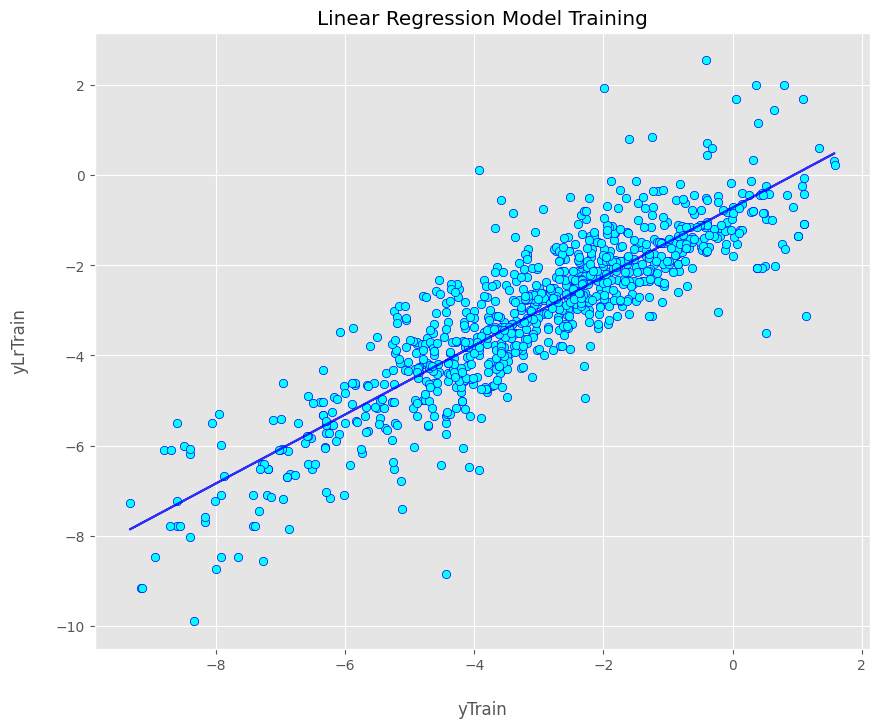

In [262]:
# Linear Regression

plt.style.use('ggplot')

plt.figure(figsize=(10, 8))
plt.scatter(x=yTrain, y=yLrTrainPred, color='cyan', linewidths=0.5, edgecolors='blue')

z = np.polyfit(yTrain, yLrTrainPred, 1)
p = np.poly1d(z)

plt.plot(yTrain, p(yTrain), color='blue', alpha=0.8)
plt.title("Linear Regression Model Training")
plt.xlabel('yTrain', labelpad=20)
plt.ylabel('yLrTrainPred', labelpad=20)


Text(0, 0.5, 'yRfTrainPred')

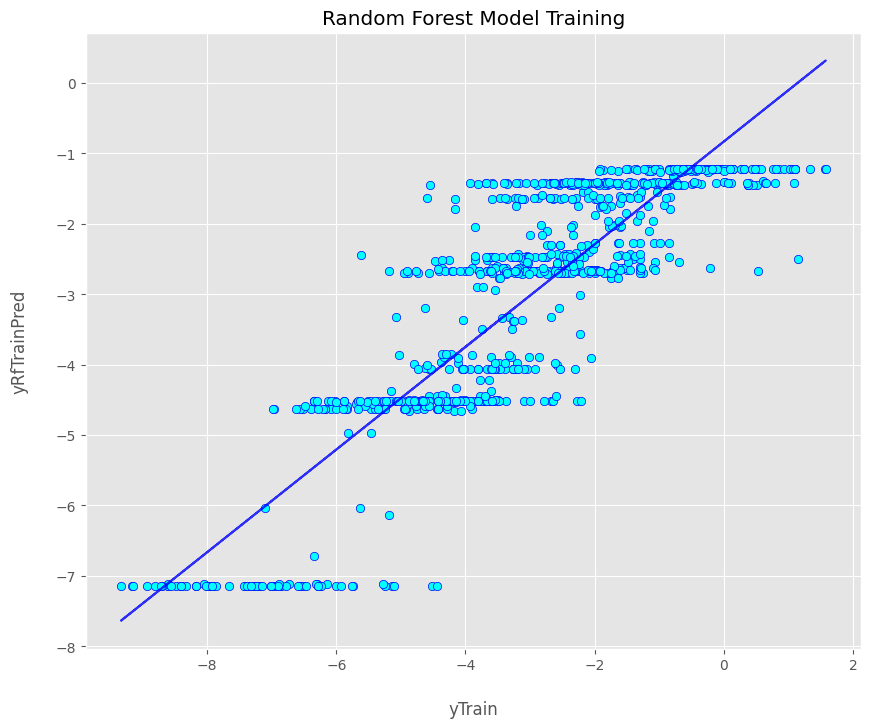

In [270]:
# Random Forest

plt.figure(figsize=(10, 8))
plt.scatter(x=yTrain, y=yRfTrainPred, color='cyan', edgecolors='blue', linewidths=0.5)

z2 = np.polyfit(yTrain, yRfTrainPred, 1)
p2 = np.poly1d(z2)

plt.plot(yTrain, p2(yTrain), color='blue', alpha=0.8)
plt.title('Random Forest Model Training')
plt.xlabel('yTrain', labelpad=20)
plt.ylabel('yRfTrainPred', labelpad=20)